### **Importing relevant libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn
from scipy import stats


# Description

A nationwide survey of hospital costs conducted by the US Agency for Healthcare
consists of hospital records of inpatient samples. The given data is restricted to
the city of Wisconsin and relates to patients in the age group 0-17 years. The
agency wants to analyze the data to research on the healthcare costs and their
utilization.

The goals of this project are:

> 1. To record the patient statistics, the agency wants to find the age category
of people who frequent the hospital and has the maximum expenditure.

> 2. In order of severity of the diagnosis and treatments and to find out the
expensive treatments, the agency wants to find the diagnosis related group
that has maximum hospitalization and expenditure.

> 3. To make sure that there is no malpractice, the agency needs to analyze if
the race of the patient is related to the hospitalization costs.

> 4. To properly utilize the costs, the agency has to analyze the severity of the
hospital costs by age and gender for proper allocation of resources.

> 5. Since the length of stay is the crucial factor for inpatients, the agency wants
to find if the length of stay can be predicted from age, gender, and race. 
> 6. To perform a complete analysis, the agency wants to find the variable that
mainly affects the hospital costs.

### **Loading Dataset**

In [5]:
import os
      

df = pd.read_csv("HospitalCosts.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     500 non-null    int64  
 1   FEMALE  500 non-null    int64  
 2   LOS     500 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  500 non-null    int64  
 5   APRDRG  500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


In [7]:
#shape of dataset
df.shape

(500, 6)

LOS = Length of Stay\
TOTCHG = Hospital Dsicharge Cost\
APRDRG = All Patient Refined Diagnosis Related Groups\

## **APR-DRGs**

Early patient classification systems, such as the
Medicare DRGs and All Patient (AP) DRGs were developed
to provide patient classification systems that relate the
types of patients treated to the resources they consume.
\
Thus, these systems focus exclusively on resource
intensity.
\
Some drawbacks of these systems:
> – Medicare DRGs were designed for the Medicare population only.\
> – Neither system is severity adjusted and therefore does not\
> provide an incentive to care for higher need patients.\
> – Higher complexity DRGs (with CC) are formed based on resource\
intensity and do not address severity of illness nor risk of
mortality.\
> – Medicare addressed these needs by developing MS-DRGs.\

**APR-DRG address these deficiencies**\
• All APR DRGs have 4 severity levels\
• Patient age is used in severity leveling\
• Significant pediatric and adult problems have a
separate APR-DRG\

**What makes APR-DRG’s Relevant?**\
• APR-DRGs make clinical sense. The clinical logic
of APR-DRGs has undergone the most intensive
scrutiny of any severity system on the market.\
• The logic is open and available. APR-DRGs are not
a “black box”.\
• The system was designed to be fully
comprehensive and account for all payers,
patients, and ages (including pediatrics).\

In [8]:
#columns in df
df.columns

Index(['AGE', 'FEMALE', 'LOS', 'RACE', 'TOTCHG', 'APRDRG'], dtype='object')

##### Changing Column names of TOTCHG

In [9]:
df.rename({"TOTCHG":"COST"}, axis=1, inplace=True)
df.head()

,AGE,FEMALE,LOS,RACE,COST,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


**Sorting df by "AGE" in descending order**

In [10]:
df.sort_values(by=["AGE","FEMALE"], ascending=False, inplace=True)
df

,AGE,FEMALE,LOS,RACE,COST,APRDRG
0,17,1,2,1.0,2660,560
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
6,17,1,4,1.0,2205,754
...,...,...,...,...,...,...
489,0,0,2,1.0,1264,640
490,0,0,2,1.0,1282,640
491,0,0,2,1.0,1393,640
493,0,0,2,1.0,1266,640


#### Viewing the dataset in another tab

webbrowser.open(url, new=0, autoraise=True)
> Display url using the default browser.\
If new is 0, the url is opened in the same browser window if possible.\
If new is 1, a new browser window is opened if possible.\
If new is 2, a new browser page (“tab”) is opened if possible.\
If autoraise is True, the window is raised if possible (note that under many window managers this will occur regardless of the setting of this variable).

In [11]:
# df.to_html("frame.html")
# url = "frame.html"
# webbrowser.open(url, new=2)

Creating a separate Dataframe for viewing rows with null values

In [12]:
df_NaN = df[df.isnull().any(axis=1)]
df_NaN

#dropping row with NaN value
df.dropna(inplace=True)

In [13]:
#describe data
df.describe()[["AGE", "LOS", "COST"]]


,AGE,LOS,COST
count,499.000000,499.000000,499.000000
mean,5.096192,2.829659,2777.631263
std,6.952706,3.366657,3891.632405
min,0.000000,0.000000,532.000000
25%,0.000000,2.000000,1218.500000
50%,0.000000,2.000000,1538.000000
75%,13.000000,3.000000,2530.500000
max,17.000000,41.000000,48388.000000


# **Task 1:**
**To record the patient statistics, the agency wants to find the age category of people who frequent the hospital and has the maximum expenditure.**

In [14]:
'''indirect way'''
unique, count = np.unique(df["AGE"], return_counts=True) #return count of each unique value in two separate lists
unique_lst = list(zip(unique,count)) #zip noth lists into a single list
print(unique_lst)

[(0, 306), (1, 10), (2, 1), (3, 3), (4, 2), (5, 2), (6, 2), (7, 3), (8, 2), (9, 2), (10, 4), (11, 8), (12, 15), (13, 18), (14, 25), (15, 29), (16, 29), (17, 38)]


In [15]:
'''direct way'''
df["AGE"].value_counts().sort_index(ascending=False) #sorting the unique values in descending order

17     38
16     29
15     29
14     25
13     18
12     15
11      8
10      4
9       2
8       2
7       3
6       2
5       2
4       2
3       3
2       1
1      10
0     306
Name: AGE, dtype: int64

create a new column to calculate cost of stay per day for each patient

In [16]:
df["SCPD"] = df["COST"] / df["LOS"] #SCPD = staying cost per day
df

,AGE,FEMALE,LOS,RACE,COST,APRDRG,SCPD
0,17,1,2,1.0,2660,560,1330.000000
2,17,1,7,1.0,20060,930,2865.714286
3,17,1,1,1.0,736,758,736.000000
4,17,1,1,1.0,1194,754,1194.000000
6,17,1,4,1.0,2205,754,551.250000
...,...,...,...,...,...,...,...
489,0,0,2,1.0,1264,640,632.000000
490,0,0,2,1.0,1282,640,641.000000
491,0,0,2,1.0,1393,640,696.500000
493,0,0,2,1.0,1266,640,633.000000


plotting boxplot and barplot of COST v/s AGE

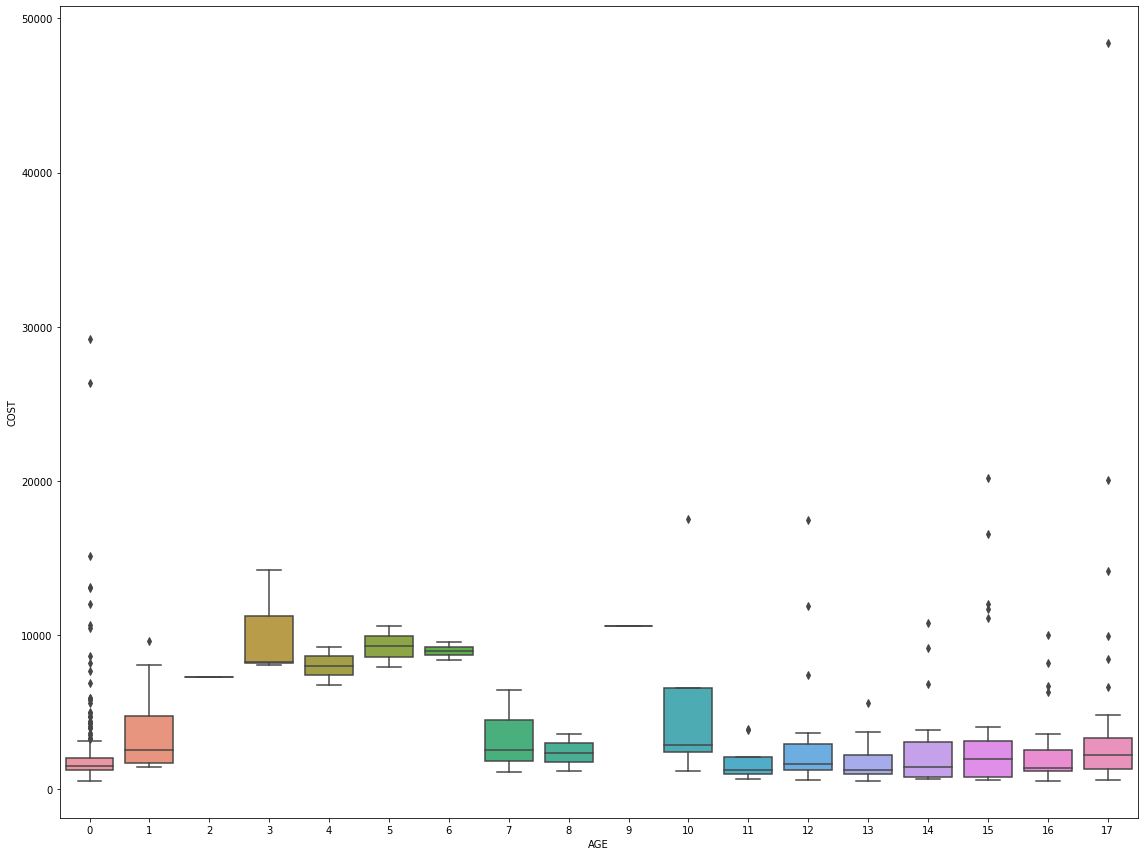

In [17]:
plt.figure(figsize=(16,12))
sns.boxplot(data=df, x="AGE", y="COST")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='AGE', ylabel='COST'>

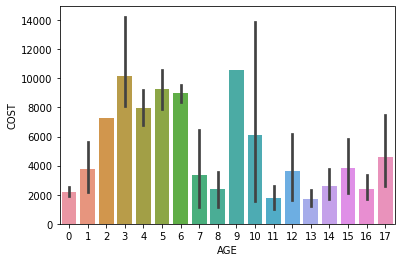

In [18]:
sns.barplot(data=df, x="AGE", y="COST")

mean of COST for each AGE sorted in decreasing order of AGE

In [19]:
df.groupby(df["AGE"]).mean()["COST"].sort_index(ascending=False)  # you can also sort values using sort_values

AGE
17     4599.394737
16     2384.448276
15     3853.344828
14     2585.720000
13     1729.722222
12     3660.800000
11     1781.250000
10     6117.250000
9     10573.500000
8      2370.500000
7      3362.333333
6      8964.000000
5      9253.500000
4      7996.000000
3     10183.333333
2      7298.000000
1      3774.400000
0      2212.294118
Name: COST, dtype: float64

total COST for each AGE sorted in decreased order of AGE

In [20]:
df.groupby(df["AGE"]).sum()["COST"].sort_index(ascending=False) #you can also sort values using sort_values

AGE
17    174777
16     69149
15    111747
14     64643
13     31135
12     54912
11     14250
10     24469
9      21147
8       4741
7      10087
6      17928
5      18507
4      15992
3      30550
2       7298
1      37744
0     676962
Name: COST, dtype: int64

# RESULT --> Task1 : 
Age category between 0-1 and 12-17 frequent hospital the most and 3-6 has maximum expenditure.

# **Task 2:**
**In order of severity of the diagnosis and treatments and to find out the expensive treatments, the agency wants to find the diagnosis related group that has maximum hospitalization and expenditure.**

count of patients v/s APRDRG

In [21]:
df["APRDRG"].value_counts().sort_values(ascending=False)

640    266
754     37
753     36
758     20
751     14
      ... 
54       1
776      1
23       1
750      1
720      1
Name: APRDRG, Length: 63, dtype: int64

<AxesSubplot:xlabel='APRDRG', ylabel='count'>

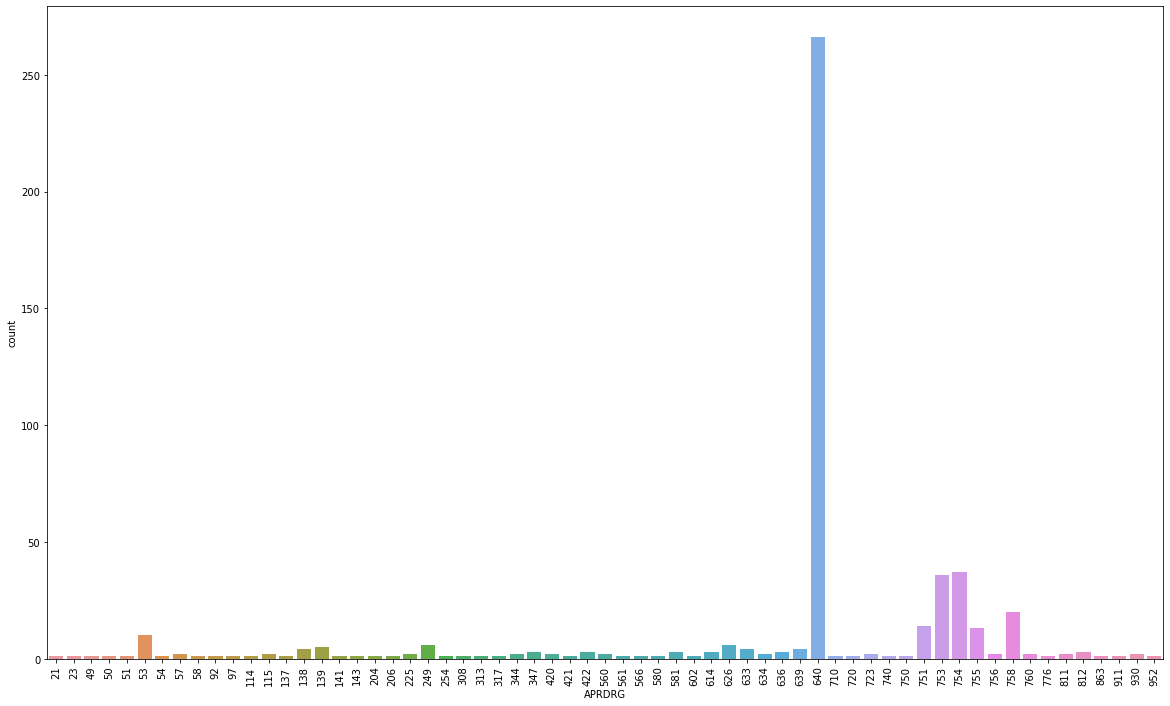

In [22]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.countplot(data=df, x="APRDRG")

scatterplot of COST v/s LOS hued according to APRDRG

<AxesSubplot:xlabel='LOS', ylabel='COST'>

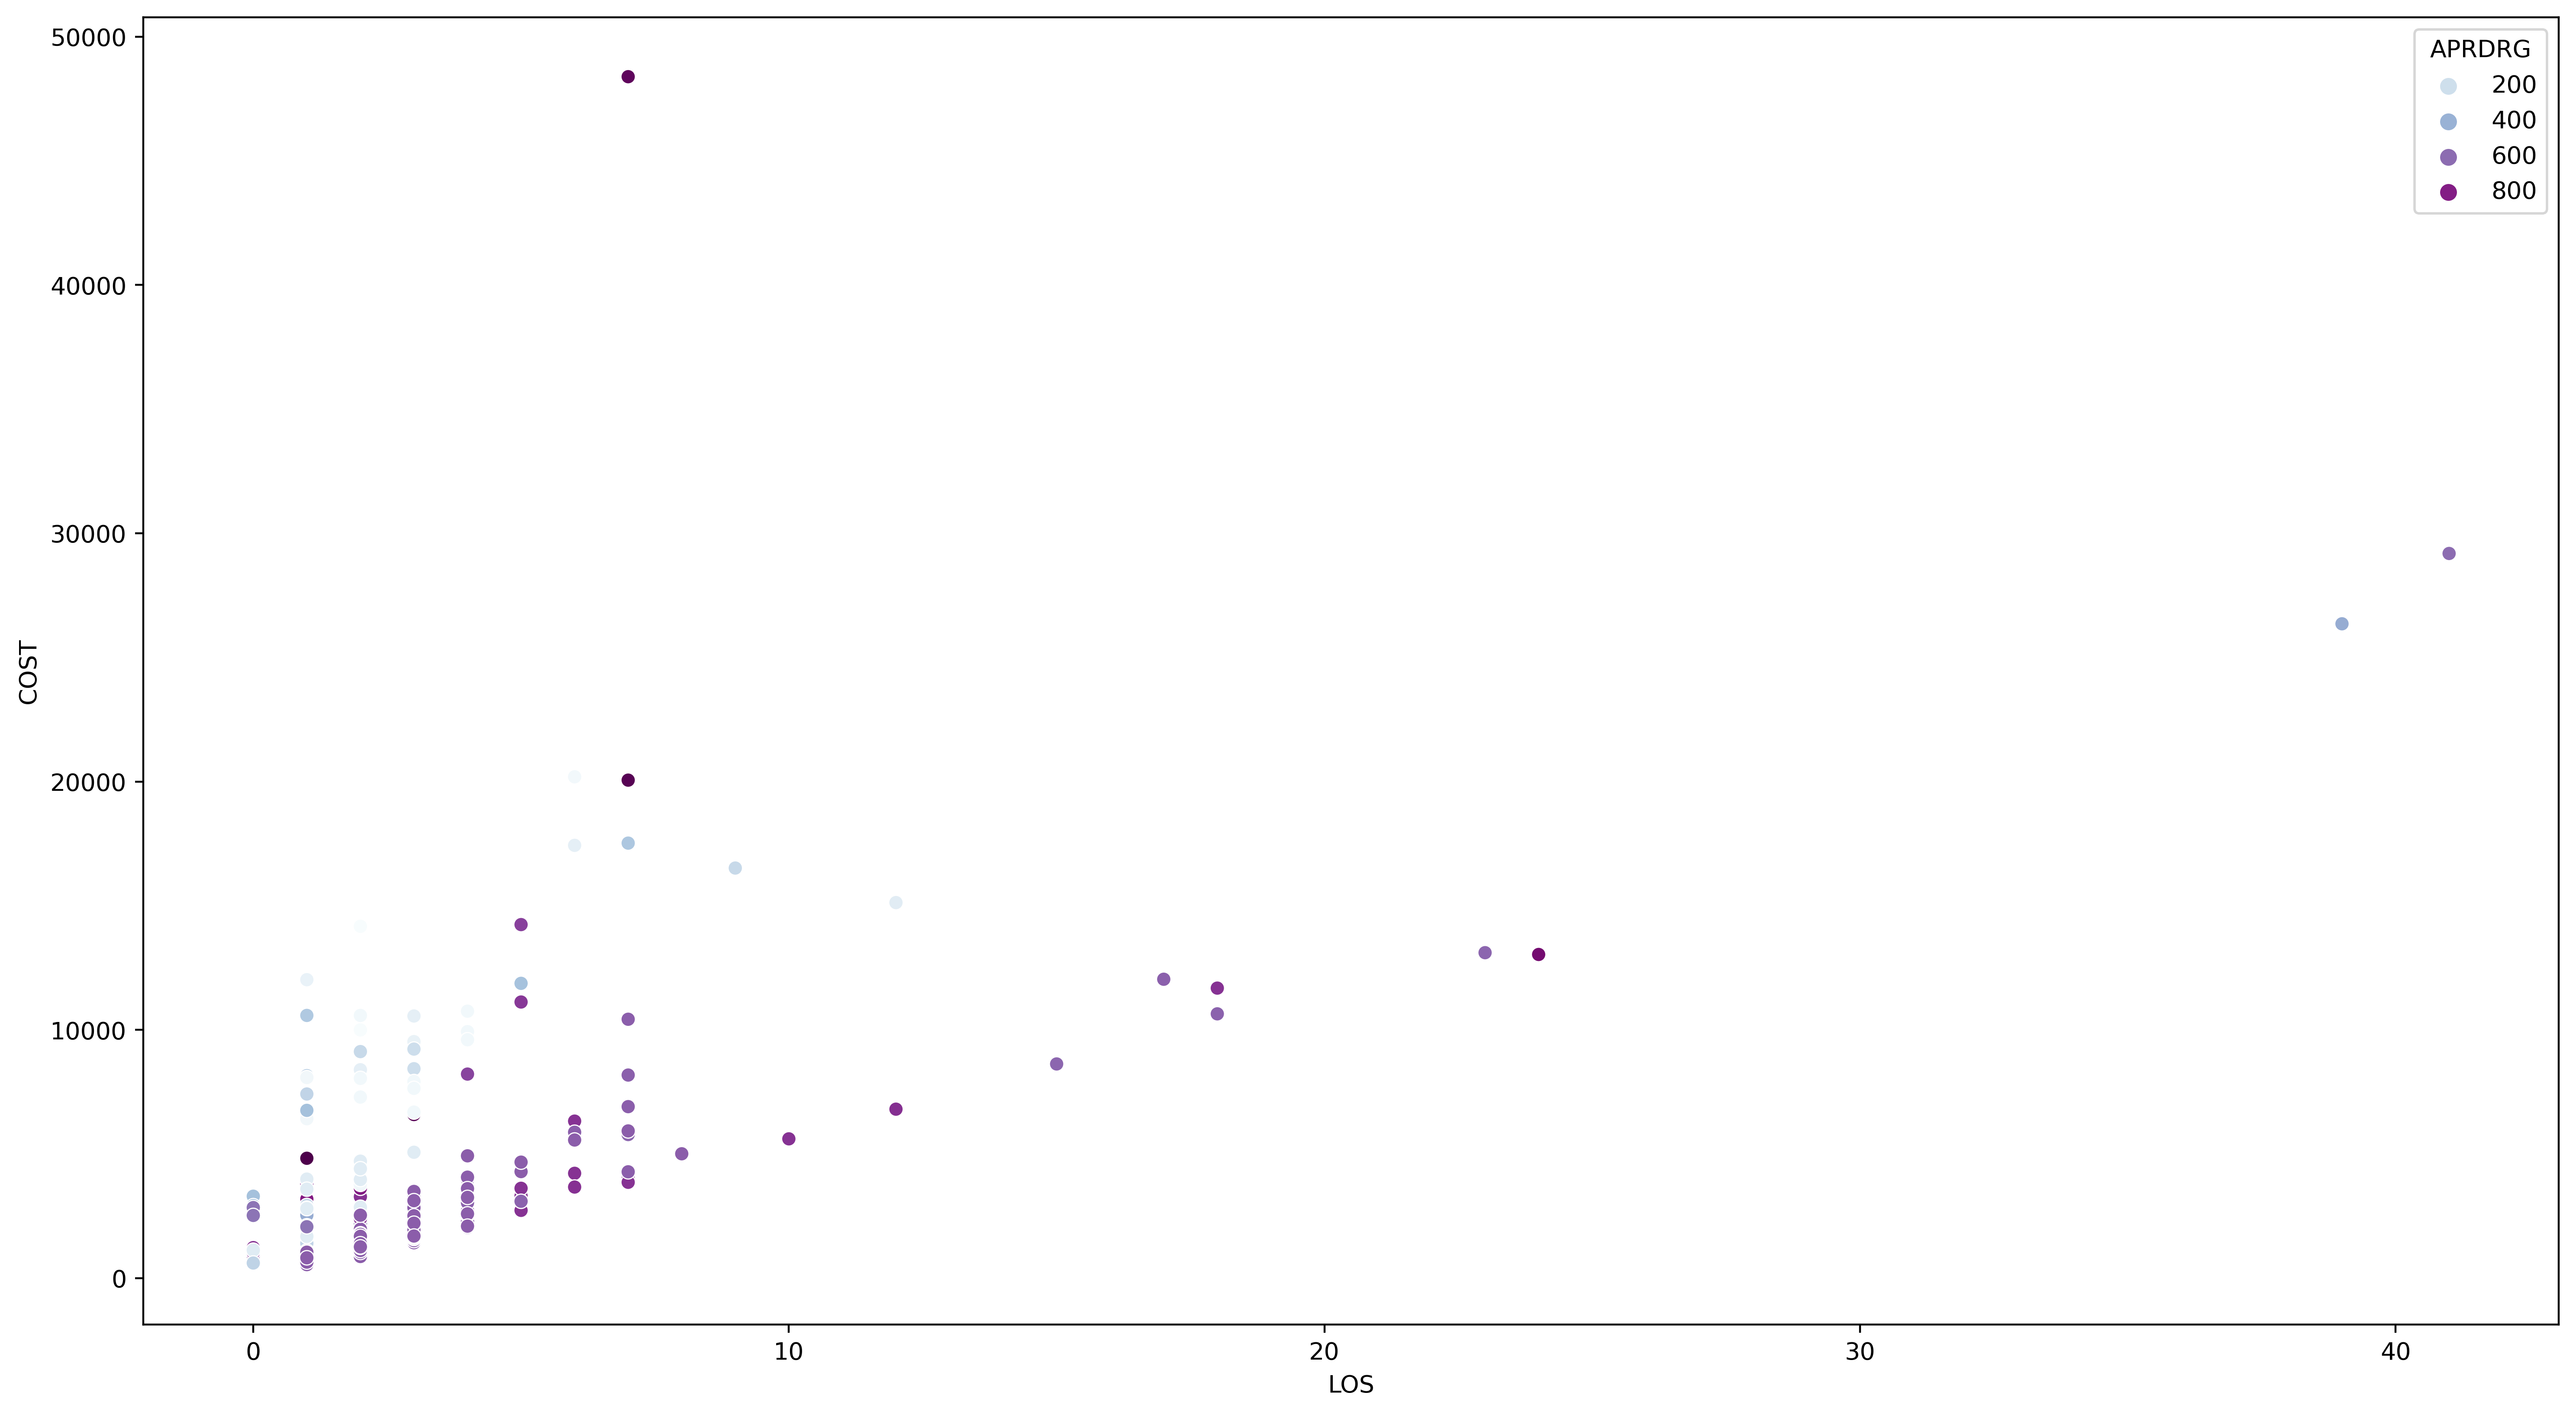

In [23]:
plt.figure(figsize=(18,10), dpi=400)
sns.scatterplot(data=df, x="LOS", y="COST", hue="APRDRG", palette="BuPu")


In [24]:
df.groupby(["APRDRG"]).mean()["COST"].sort_values(ascending=False)

APRDRG
911    48388.000000
602    29188.000000
421    26356.000000
49     20195.000000
317    17524.000000
           ...     
776     1193.000000
755      859.076923
54       851.000000
756      747.000000
254      615.000000
Name: COST, Length: 63, dtype: float64

In [25]:
df.groupby(["APRDRG"]).mean()["LOS"].sort_values(ascending=False)

APRDRG
602    41.000000
421    39.000000
863    24.000000
614    15.000000
137    12.000000
         ...    
313     1.000000
811     0.500000
347     0.333333
581     0.333333
254     0.000000
Name: LOS, Length: 63, dtype: float64

In [26]:
df.groupby(["APRDRG"]).mean()["SCPD"].sort_values(ascending=False)

APRDRG
344        inf
254        inf
92     12024.0
308    10585.0
313     8159.0
        ...   
581        NaN
753        NaN
754        NaN
755        NaN
811        NaN
Name: SCPD, Length: 63, dtype: float64

In [27]:
# url = "frame.html"
# df.to_html(url)
# webbrowser.open(url, new=2)

# Result --> Task 2:
911 has highest expenditure whereas 640 frequent hospital the most and 602 has highest LOS among all. 

# **Task 3:**

**To make sure that there is no malpractice, the agency needs to analyze if the race of the patient is related to the hospitalization costs.**

In [28]:
df["RACE"].value_counts().sort_index()

1.0    484
2.0      6
3.0      1
4.0      3
5.0      3
6.0      2
Name: RACE, dtype: int64

<AxesSubplot:xlabel='RACE', ylabel='COST'>

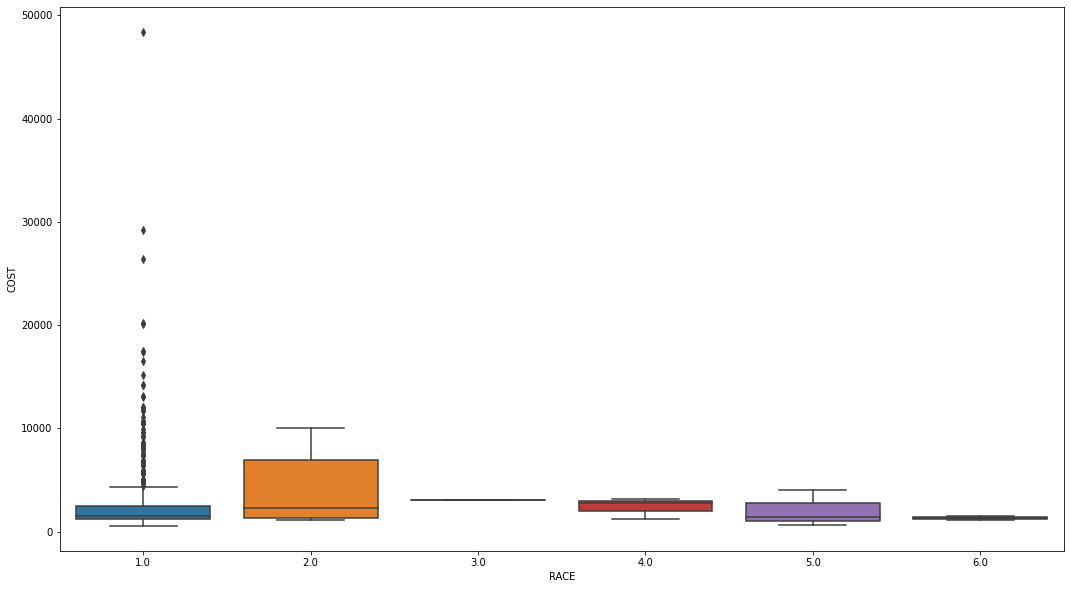

In [29]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=df, x="RACE", y="COST")

In [30]:
df["COST"].describe()

count      499.000000
mean      2777.631263
std       3891.632405
min        532.000000
25%       1218.500000
50%       1538.000000
75%       2530.500000
max      48388.000000
Name: COST, dtype: float64

In [31]:
df.groupby(["RACE"]).mean()["COST"].sort_values(ascending=False)

RACE
2.0    4202.166667
3.0    3041.000000
1.0    2772.669421
4.0    2344.666667
5.0    2026.666667
6.0    1349.000000
Name: COST, dtype: float64

From overall mean of COST, we can see that RACE 2.0 and 3.0 has higher average cost. Thus, we will examine RACE 2.0 and 3.0.

In [32]:
df.groupby(["RACE"]).describe()["COST"][2:3]

C:\Users\hites\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:4529: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
C:\Users\hites\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:4530: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)


,count,mean,std,min,25%,50%,75%,max
RACE,,,,,,,,
2.0,6.0,4202.166667,3884.810905,1153.0,1351.75,2304.0,6887.75,10002.0
3.0,1.0,3041.000000,NaN,3041.0,3041.00,3041.0,3041.00,3041.0


In [33]:
def detect_outlier(x, limit=1.3):
    percentile_25 = np.percentile(x, 25)
    percentile_75 = np.percentile(x, 75)
    iqr =  percentile_75 - percentile_25
    limit_inf = np.maximum(percentile_25 - limit * iqr, np.min(x))
    limit_sup = np.minimum(percentile_75 + limit * iqr, np.max(x))
    print("limit_inf : ", limit_inf)
    print("limit_sup : ", limit_sup)
    return np.where((x < limit_inf) | (x > limit_sup), True, False) # bitwise OR operator = |  


In [34]:
outlier = detect_outlier(df.COST)
outlier

limit_inf :  532.0
limit_sup :  4236.1


array([False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False,

In [35]:
np.asarray(df["RACE"])[outlier]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

There are many outliers of RACE 1.0 but mean is almost as overall mean whereas RACE 2.0 has 2 outliers and has a very high mean.

# Result --> Task 3:
RACE 2.0 has higher mean of COST than other races and is also considerably higher than overall mean of COST. Thus, RACE 2.0 people might be unjustly treated and hospital should look into this matter.

# **Task 4:**
**To properly utilize the costs, the agency has to analyze the severity of the hospital costs by age and gender for proper allocation of resources.**

<AxesSubplot:xlabel='FEMALE', ylabel='COST'>

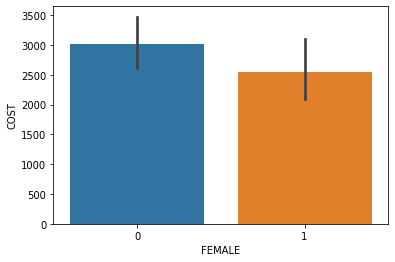

In [36]:
sns.barplot(data=df, x="FEMALE", y="COST")

In [37]:
df.groupby(["FEMALE"]).describe()["COST"]

,count,mean,std,min,25%,50%,75%,max
FEMALE,,,,,,,,
0,244.0,3013.897541,3549.652536,550.0,1285.75,1669.0,2841.25,26356.0
1,255.0,2551.556863,4187.368646,532.0,1140.00,1436.0,2267.50,48388.0


<AxesSubplot:xlabel='AGE', ylabel='COST'>

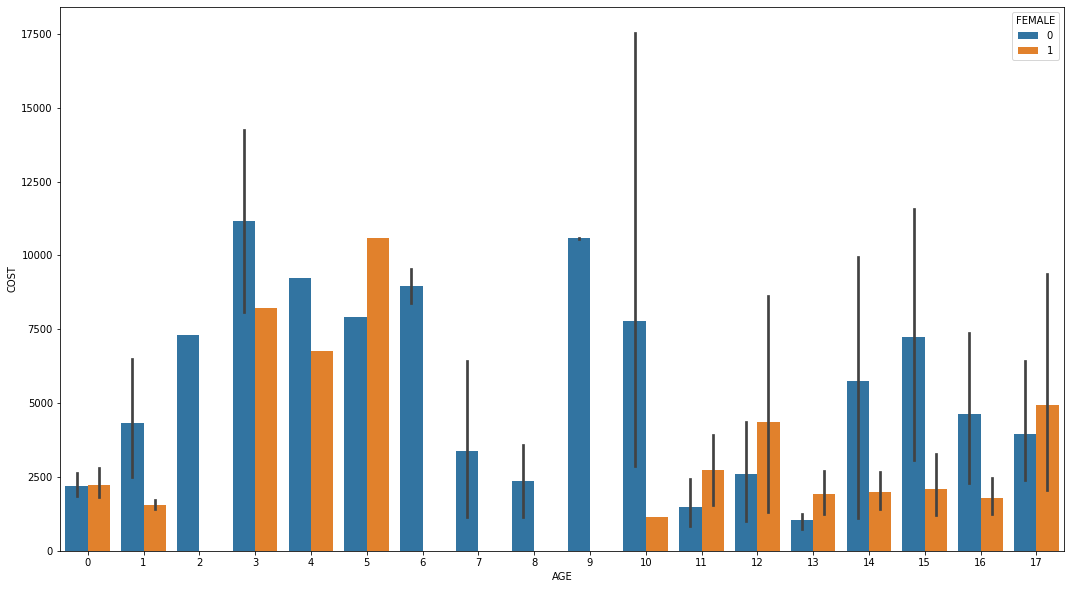

In [38]:
plt.figure(figsize=(18,10))
sns.barplot(data=df, x="AGE", y="COST", hue="FEMALE")

# RESULT --> Task 4:
The cost for men is larger for all ages except 5, 17 and 11 to 13.

# **Task 5:**
**Since the length of stay is the crucial factor for inpatients, the agency wants to find if the length of stay can be predicted from age, gender, and race.**

<AxesSubplot:xlabel='AGE', ylabel='LOS'>

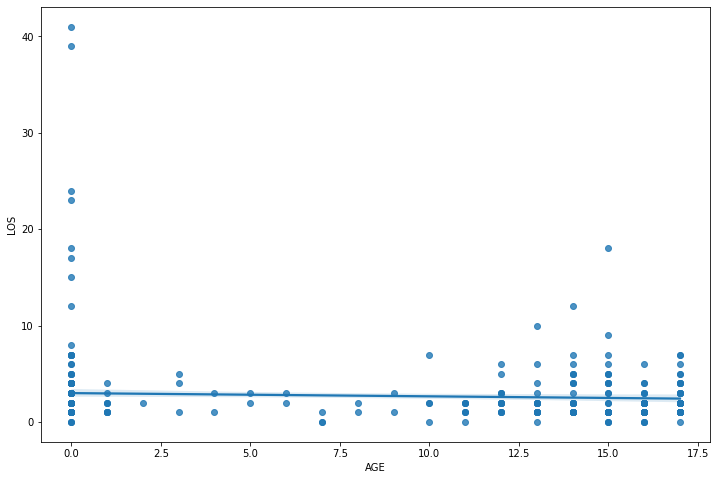

In [39]:
plt.figure(figsize=(12,8))
sns.regplot(data=df, x="AGE", y="LOS")

<AxesSubplot:xlabel='FEMALE', ylabel='LOS'>

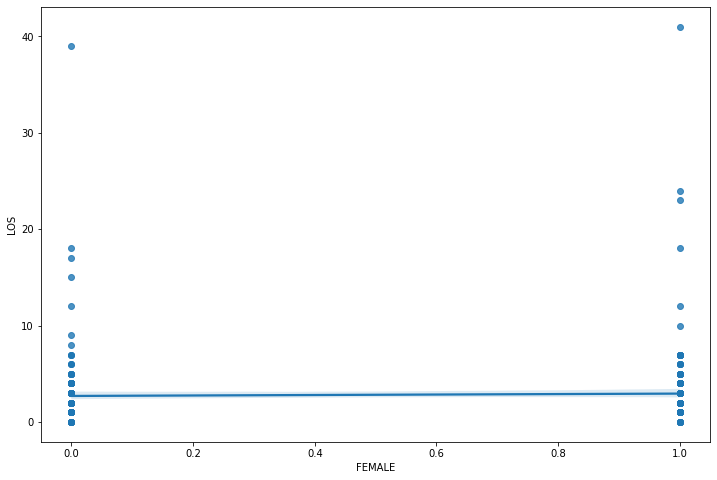

In [40]:
plt.figure(figsize=(12,8))
sns.regplot(data=df, x="FEMALE", y="LOS")

<AxesSubplot:xlabel='RACE', ylabel='LOS'>

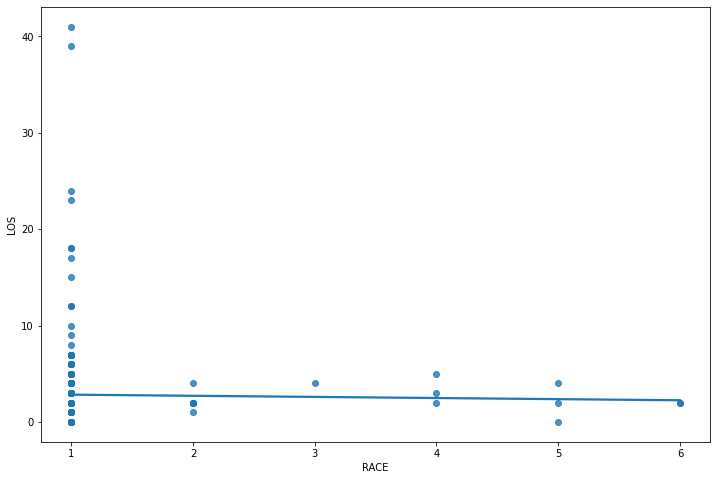

In [41]:
plt.figure(figsize=(12,8))
sns.regplot(data=df, x="RACE", y="LOS", ci=None)

# RESULT --> Task 5:
Since, regression plot for AGE,GENDER and RACE are almost straight line parallel to x axis, there is no correlation between LOS and AGE,GENDER and RACE.

# **Task 6:**
**To perform a complete analysis, the agency wants to find the variable that mainly affects the hospital costs.**

To find the independant variable that most affects the COST, we need to plot regplots and see which variable has highest positive correlation with COST.

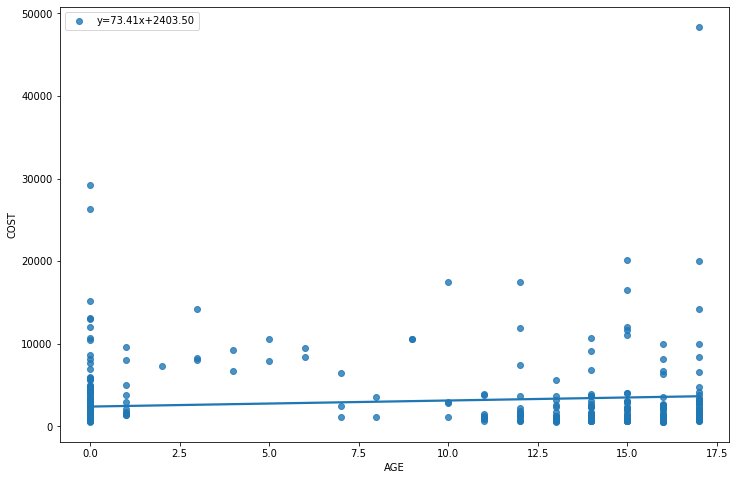

In [42]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["AGE"], df["COST"])

plt.figure(figsize=(12,8))
sns.regplot(data=df, x="AGE", y="COST", ci=None, label="y={0:.2f}x+{1:.2f}".format(slope, intercept)).legend(loc="best")

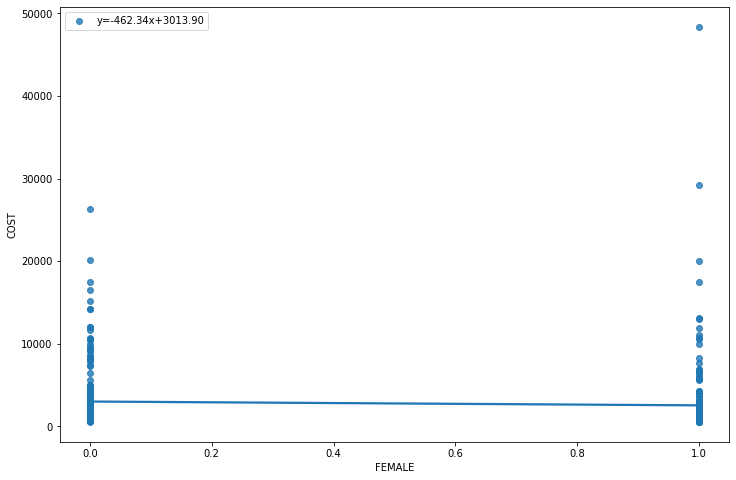

In [43]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["FEMALE"], df["COST"])

plt.figure(figsize=(12,8))
sns.regplot(data=df, x="FEMALE", y="COST", ci=None, label="y={0:.2f}x+{1:.2f}".format(slope, intercept)).legend(loc="best")


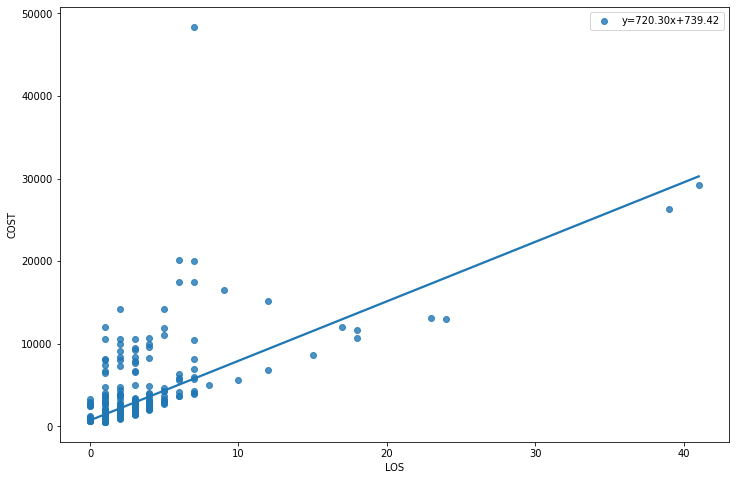

In [44]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["LOS"], df["COST"])

plt.figure(figsize=(12, 8))
sns.regplot(data=df, x="LOS", y="COST", ci=None, label="y={0:.2f}x+{1:.2f}".format(slope, intercept)).legend(loc="best")


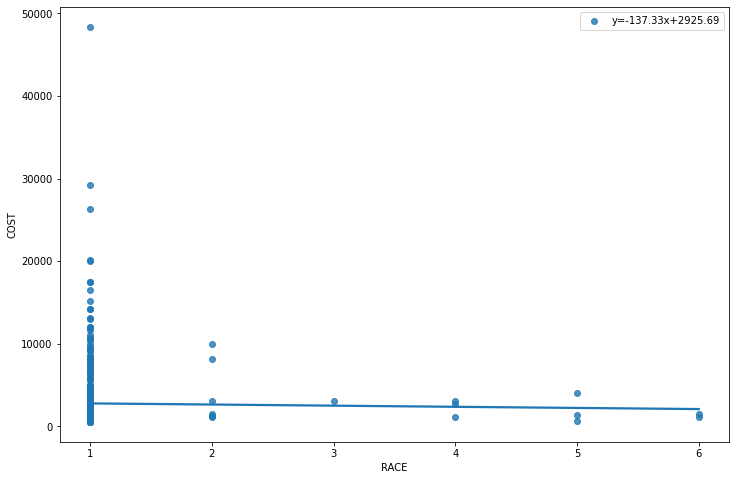

In [45]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["RACE"], df["COST"])

plt.figure(figsize=(12, 8))
sns.regplot(data=df, x="RACE", y="COST", ci=None, label="y={0:.2f}x+{1:.2f}".format(slope, intercept)).legend(loc="best")


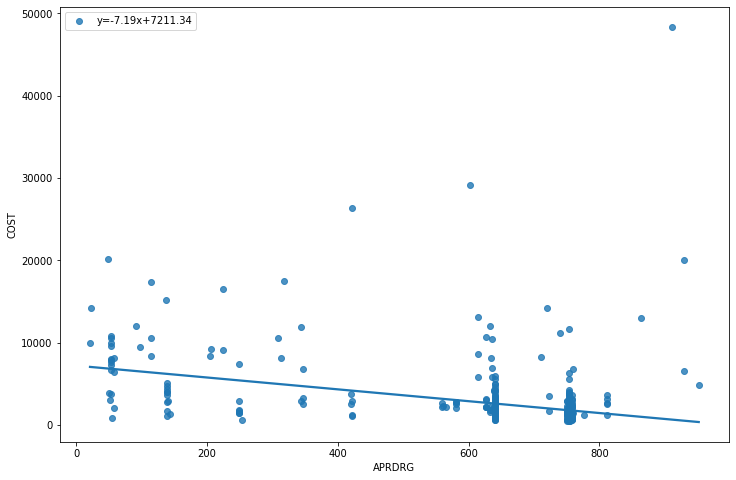

In [46]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["APRDRG"], df["COST"])

plt.figure(figsize=(12, 8))
sns.regplot(data=df, x="APRDRG", y="COST", ci=None,
            label="y={0:.2f}x+{1:.2f}".format(slope, intercept)).legend(loc="best")


# RESULT --> Task 6:
We can easily see that the two factors that affect COST the most are LOS and FEMALE with slope 720.3 and -462.34.